
# Credit Card Customers:   Predict Churning Customers (Alternate Project Option #2)

Group: Anthony Yun, Danny Sov


###### The URL for the data
https://www.kaggle.com/sakshigoyal7/credit-card-customers



##### The cleaned dataset contains the following fields:

- **Income_Sorted***:  Income_Category was sorted in numerical descending order:
     - (4 = $120K +, 3 = $80K - $120K, 2 = $60K - $80K, 1 = $40K - $60K, 0 = Less than $40K)
- **Attrition_Flag**:  Internal event (customer activity) variable - if the account is closed then 1 else 0
- **Age**:  Demographic variable - Customer's Age in Years
- **Gender**:  Demographic variable - M=Male, F=Female
- **Education_Level**:  Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- **Marital_Status**:  Demographic variable - Married, Single, Divorced, Unknown
- **Income_Category**:  Demographic variable - Annual Income Category of the account holder: 
     - (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
- **Length_Of_Relationship**:  Period of relationship with bank
- **Total_Relationship_Count**:  Total no. of products held by the customer
- **Customer_Contacts**:  No. of Contacts in the last 12 months
- **Credit_Limit**:  Credit Limit on the Credit Card
- **Total_Revolving_Bal**:  Total Revolving Balance on the Credit Card
- **Available_Credit**:  Open to Buy Credit Line (Average of last 12 months)
- **Total_Trans_Amt**:  Total Transaction Amount (Last 12 months)
- **Total_Trans_Ct**:  Total Transaction Count (Last 12 months)
- **Avg_Trans_Amt***:  Total Transaction Amount divided by Total Transaction Count (Last 12 months)
- **Relationship_Category***:  How many years of relationship the customer has:
    - Diamond VIP >= 50 yrs, 
    - Platinum VIP = 40-49 yrs, 
    - Gold VIP = 30-39 yrs, 
    - Silver VIP = 20-29 yrs, 
    - Bronze VIP = 10-19 yrs,
    - Valued Customer = under 10 yrs

## ※ Questions



1.  What are the demographics of the customers?


2.  Does education level impact the credit line of the customers?


3.  How do female and male customers compare in reported income and are customers with higher income given higher credit limits?


4.  Is it possible that the highest credit limits being given to mostly males is due to household income reported for the husband's income in married couples?


5.  Is it less likely for customers to leave if they have multiple products with one financial institution?


6.  How does customer's balance and usage affect attrition?

## ※ Import Libraries and Set-Up for Visualizations & Statistics

In [7]:
print('Done by Anthony')
# filter warnings from displaying in Jupyter Notebook
import warnings;
warnings.filterwarnings('ignore')

Done by Anthony


In [8]:
print('Done by Anthony')
# import required libraries of pandas, numpy
import pandas as pd
import numpy as np
# import visualization libraries of pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# set default matplotlib style to 'ggplot'
plt.style.use('ggplot')

# set default seaborn theme, scaling, and color palette
sns.set()

# import statistics package
from scipy import stats
from scipy.stats import normaltest
# allow matplot plots to show in jupyter notebook
%matplotlib inline

Done by Anthony


## ※ Import Data

In [10]:
print('Done by Anthony')
# load dataset BankChurners.csv into a dataframe and read it into DataFrame: df
df = pd.read_csv('BankChurners.csv')

Done by Anthony


## ※ Inspect Data

In [12]:
print('Done by Anthony')
# inspect the top 5 rows of the dataframe using the head method
df.head()

Done by Anthony


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [13]:
print('Done by Anthony')
# inspect the bottom 5 rows of the dataframe using the tail method
df.tail()

Done by Anthony


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [14]:
print('Done by Anthony')
# call the shape attribute to look at the number of rows and columns in the dataset
df.shape

Done by Anthony


(10127, 23)

## ※ Cleaning Data

In [16]:
print('Done by Anthony')
# drop all duplicate rows and cast it to a new DataFrame df_Customers so that we don't mess with the original dataset
df_Customers = df.drop_duplicates()

Done by Anthony


In [17]:
print('Done by Anthony')
# call the columns attribute and iterate the columns to check if there any extra space or bad characters in the column names
for col in df_Customers.columns:
    print(col)

Done by Anthony
CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [18]:
print('Done by Anthony')
# drop columns of clientnum, dependent count, cardcategory, monthsinactive12,totalamtchng q4q1, totalctchangq4q1, avgutilizationratio, naives bayes 
df_Customers.drop(['CLIENTNUM',
                   'Dependent_count',
                   'Card_Category',
                   'Months_Inactive_12_mon', 
                   'Total_Amt_Chng_Q4_Q1',
                   'Total_Ct_Chng_Q4_Q1',
                   'Avg_Utilization_Ratio',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                  ]
                  ,axis=1, inplace=True) 

Done by Anthony


In [19]:
print('Done by Anthony')
# rename columns customer age to age, monthsonbook to length of relationship, contacts count 12 mon to customer contacts, avg open to buy to available credit
df_Customers.rename(columns={'Customer_Age': 'Age', 'Months_on_book': 'Length_of_Relationship', 'Contacts_Count_12_mon': 'Customer_Contacts', 'Avg_Open_To_Buy': 'Available_Credit'}, inplace=True)

# inspect the top 5 rows of the new DataFrame df_Customers
df_Customers.head()

Done by Anthony


,Attrition_Flag,Age,Gender,Education_Level,Marital_Status,Income_Category,Length_of_Relationship,Total_Relationship_Count,Customer_Contacts,Credit_Limit,Total_Revolving_Bal,Available_Credit,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,M,High School,Married,$60K - $80K,39,5,3,12691.0,777,11914.0,1144,42
1,Existing Customer,49,F,Graduate,Single,Less than $40K,44,6,2,8256.0,864,7392.0,1291,33
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,36,4,0,3418.0,0,3418.0,1887,20
3,Existing Customer,40,F,High School,Unknown,Less than $40K,34,3,1,3313.0,2517,796.0,1171,20
4,Existing Customer,40,M,Uneducated,Married,$60K - $80K,21,5,0,4716.0,0,4716.0,816,28


In [20]:
print('Done by Anthony')
# uniformly capitalize the first letters of the column names
df_Customers.columns = [col.capitalize() for col in df_Customers.columns]
# convert column names to string dtype
df_Customers.columns = df_Customers.columns.astype(str)

# convert strings into titlecase: first character of each word to uppercase and remaining to lowercase
df_Customers.columns = df_Customers.columns.str.title()

Done by Anthony


In [21]:
print('Done by Anthony')
# call the info method to confirm titlecase and 
# get additional information about our dataframe including the datatype of the different columns and 
# how many missing values exist in each column
df_Customers.info()

## confirm there are no null values in the dataset

Done by Anthony
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Age                       10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Length_Of_Relationship    10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Customer_Contacts         10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Available_Credit          10127 non-null  float64
 12  Total_Trans_Amt           10127 non-null  int64  
 13  Total_Trans_Ct            10127 non-null  int

In [22]:
print('Done by Anthony')
# although there were no 'NaN' values, notice the 'Unknown' value in the Marital_Status column
# check Education_Level column to see if there are possibly more in other columns
# return the unique values in the Education_Level column
df_Customers['Education_Level'].unique()

Done by Anthony


array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [23]:
print('Done by Anthony')
# drop all rows with 'Unknown' values in the dataset
df_Customers = df_Customers.replace('Unknown', np.nan).dropna()

Done by Anthony


In [24]:
print('Done by Anthony')
# call the shape attribute to look at the revised number of rows and columns in the dataset
# our original DataFrame df had 10,127 rows, 
# by dropping 'Unknown' values, 3046 rows (about 30%) of the dataset has been lost
# in addition, 9 columns have been deemed irrelevent and removed
df_Customers.shape

Done by Anthony


(7081, 14)

In [25]:
print('Done by Anthony')
# write a function that takes two inputs, Total_Trans_Amt and Total_Trans_Ct 
# and calculates the Avg_Trans_Amt and add new column to the DataFrame df_Customers
def calculate_Avg_Trans_Amt(df_Customers): 
    df_Customers['Avg_Trans_Amt'] = df_Customers['Total_Trans_Amt']/df_Customers['Total_Trans_Ct']
    return df_Customers
    # returns the average between total and count
df_Customers = calculate_Avg_Trans_Amt(df_Customers)


# call the datatype for the df_Customers DataFrame
df_Customers.dtypes

Done by Anthony


Attrition_Flag               object
Age                           int64
Gender                       object
Education_Level              object
Marital_Status               object
Income_Category              object
Length_Of_Relationship        int64
Total_Relationship_Count      int64
Customer_Contacts             int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Available_Credit            float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Avg_Trans_Amt               float64
dtype: object

In [26]:
print('Done by Anthony')
# pass in 'category' or 'float64' parameters to astype method to convert datatypes
conversion_dict = {'Gender': 'category',
                   'Education_Level': 'category', 
                   'Marital_Status': 'category', 
                   'Income_Category' : 'category',
                   'Total_Revolving_Bal': np.float64,
                   'Total_Trans_Amt': np.float64
                  } 
df_Customers = df_Customers.astype(conversion_dict)
# check the datatype again to confirm
df_Customers.dtypes

Done by Anthony


Attrition_Flag                object
Age                            int64
Gender                      category
Education_Level             category
Marital_Status              category
Income_Category             category
Length_Of_Relationship         int64
Total_Relationship_Count       int64
Customer_Contacts              int64
Credit_Limit                 float64
Total_Revolving_Bal          float64
Available_Credit             float64
Total_Trans_Amt              float64
Total_Trans_Ct                 int64
Avg_Trans_Amt                float64
dtype: object

In [27]:
print('Done by Anthony')
# define function vip to create a Relationship_Category years as a parameter

#   if years >= 50:return 'Diamond VIP'
#    elif 40 <= years < 50: return 'Platinum VIP'
#    elif 30 <= years < 40: return 'Gold VIP'
#    elif 20 <= years < 30:return 'Silver VIP'
#    elif 10 <= years < 20:return 'Bronze VIP'
#    else:return 'Valued Customer'

def VIP(years):
    if years >= 50:
        return 'Diamond VIP'
    elif 40 <= years < 50:
        return 'Platinum VIP'
    elif 30 <= years < 40:
        return 'Gold VIP'
    elif 20 <= years < 30:
        return 'Silver VIP'
    elif 10 <= years < 20:
        return 'Bronze VIP'
    else:
        return 'Valued Customer'

df_Customers['Relationship_Category'] = df_Customers['Length_Of_Relationship'].apply(VIP)

df_Customers.head()

Done by Anthony


,Attrition_Flag,Age,Gender,Education_Level,Marital_Status,Income_Category,Length_Of_Relationship,Total_Relationship_Count,Customer_Contacts,Credit_Limit,Total_Revolving_Bal,Available_Credit,Total_Trans_Amt,Total_Trans_Ct,Avg_Trans_Amt,Relationship_Category
0,Existing Customer,45,M,High School,Married,$60K - $80K,39,5,3,12691.0,777.0,11914.0,1144.0,42,27.238095,Gold VIP
1,Existing Customer,49,F,Graduate,Single,Less than $40K,44,6,2,8256.0,864.0,7392.0,1291.0,33,39.121212,Platinum VIP
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,36,4,0,3418.0,0.0,3418.0,1887.0,20,94.350000,Gold VIP
4,Existing Customer,40,M,Uneducated,Married,$60K - $80K,21,5,0,4716.0,0.0,4716.0,816.0,28,29.142857,Silver VIP
5,Existing Customer,44,M,Graduate,Married,$40K - $60K,36,3,2,4010.0,1247.0,2763.0,1088.0,24,45.333333,Gold VIP


In [28]:
print('Done by Danny')
# create a mapping DataFrame to represent a custom sort
sort_mapping = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4
}

df_mapping = pd.DataFrame(list(sort_mapping.items()), columns=["Income", "Sort_Order"])

df_mapping = df_mapping.set_index("Income")

df_mapping = df_mapping.rename(columns={"Sort_Order": "index"})

df_mapping

Done by Danny


,index
Income,
Less than $40K,0
$40K - $60K,1
$60K - $80K,2
$80K - $120K,3
$120K +,4


In [29]:
print('Done by Danny')
# create a new column 'Income_Sorted' with mapped value from sort_mapping
df_Customers["Income_Sorted"] = df_Customers["Income_Category"].map(sort_mapping)

# check the dtype of new added column 'Income_Sorted'
df_Customers['Income_Sorted'].dtypes


Done by Danny


CategoricalDtype(categories=[4, 1, 2, 3, 0], ordered=False, categories_dtype=int64)

In [30]:
print('Done by Danny')
# pass in 'int' parameters to astype method to convert 'Income_Sorted' datatype from category to integer
df_Customers['Income_Sorted'] = df_Customers['Income_Sorted'].astype(int)

Done by Danny


In [31]:
print('Done by Danny')
# reorder rows based on new column Income_Sorted in descending order
df_Customers = df_Customers.sort_values(by='Income_Sorted', ascending=False)

df_Customers = df_Customers.reset_index(drop=True)

df_Customers

Done by Danny


,Attrition_Flag,Age,Gender,Education_Level,Marital_Status,Income_Category,Length_Of_Relationship,Total_Relationship_Count,Customer_Contacts,Credit_Limit,Total_Revolving_Bal,Available_Credit,Total_Trans_Amt,Total_Trans_Ct,Avg_Trans_Amt,Relationship_Category,Income_Sorted
0,Existing Customer,56,M,College,Married,$120K +,43,6,2,17539.0,2517.0,15022.0,1220.0,30,40.666667,Platinum VIP,4
1,Existing Customer,57,M,Post-Graduate,Married,$120K +,51,4,3,16952.0,0.0,16952.0,1918.0,61,31.442623,Diamond VIP,4
2,Existing Customer,33,M,Post-Graduate,Married,$120K +,14,6,0,7571.0,2264.0,5307.0,2273.0,49,46.387755,Bronze VIP,4
3,Attrited Customer,52,M,College,Single,$120K +,32,4,1,4935.0,0.0,4935.0,7886.0,64,123.218750,Gold VIP,4
4,Existing Customer,48,M,Graduate,Married,$120K +,39,4,4,24931.0,1353.0,23578.0,5031.0,79,63.683544,Gold VIP,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,Existing Customer,26,M,Graduate,Married,Less than $40K,36,5,4,9916.0,0.0,9916.0,3477.0,65,53.492308,Gold VIP,0
7077,Existing Customer,39,F,Graduate,Married,Less than $40K,29,4,4,1438.3,949.0,489.3,4222.0,65,64.953846,Silver VIP,0
7078,Attrited Customer,51,F,Doctorate,Single,Less than $40K,45,5,1,1952.0,1411.0,541.0,2452.0,44,55.727273,Platinum VIP,0
7079,Existing Customer,37,F,Uneducated,Married,Less than $40K,36,6,4,1438.3,647.0,791.3,4803.0,64,75.046875,Gold VIP,0


In [32]:
print('Done by Danny')
# the set_index method has been called to place Income_Sorted column first as index for DataFrame df_Customers

df_Customers = df_Customers.set_index('Income_Sorted')

df_Customers

Done by Danny


,Attrition_Flag,Age,Gender,Education_Level,Marital_Status,Income_Category,Length_Of_Relationship,Total_Relationship_Count,Customer_Contacts,Credit_Limit,Total_Revolving_Bal,Available_Credit,Total_Trans_Amt,Total_Trans_Ct,Avg_Trans_Amt,Relationship_Category
Income_Sorted,,,,,,,,,,,,,,,,
4,Existing Customer,56,M,College,Married,$120K +,43,6,2,17539.0,2517.0,15022.0,1220.0,30,40.666667,Platinum VIP
4,Existing Customer,57,M,Post-Graduate,Married,$120K +,51,4,3,16952.0,0.0,16952.0,1918.0,61,31.442623,Diamond VIP
4,Existing Customer,33,M,Post-Graduate,Married,$120K +,14,6,0,7571.0,2264.0,5307.0,2273.0,49,46.387755,Bronze VIP
4,Attrited Customer,52,M,College,Single,$120K +,32,4,1,4935.0,0.0,4935.0,7886.0,64,123.218750,Gold VIP
4,Existing Customer,48,M,Graduate,Married,$120K +,39,4,4,24931.0,1353.0,23578.0,5031.0,79,63.683544,Gold VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Existing Customer,26,M,Graduate,Married,Less than $40K,36,5,4,9916.0,0.0,9916.0,3477.0,65,53.492308,Gold VIP
0,Existing Customer,39,F,Graduate,Married,Less than $40K,29,4,4,1438.3,949.0,489.3,4222.0,65,64.953846,Silver VIP
0,Attrited Customer,51,F,Doctorate,Single,Less than $40K,45,5,1,1952.0,1411.0,541.0,2452.0,44,55.727273,Platinum VIP


In [33]:
print('Done by Anthony')
# pivot table to get a horizontal view of the data column
#  output mean of the values as age columns as gender
pivot_table = df_Customers.pivot_table(values='Age', columns='Gender', aggfunc='mean')

pivot_table

Done by Anthony


Gender,F,M
Age,46.436741,46.266595


In [34]:
print('Done by Danny')
# another pivot table to get a horizontal view of the data column to see the median of the column values
#values length of relationship, columns attrition flag, aggfunc median
pivot_table_median = df_Customers.pivot_table(values='Length_Of_Relationship', 
                                              columns='Attrition_Flag', 
                                              aggfunc='median')

print(pivot_table_median)
df_Customers.shape


Done by Danny
Attrition_Flag          Attrited Customer  Existing Customer
Length_Of_Relationship               36.0               36.0


(7081, 16)

📝 Note that at the end of all the data cleaning, we now have 7081 rows x 17 columns.

## ※  Data Visualization

Done by Danny


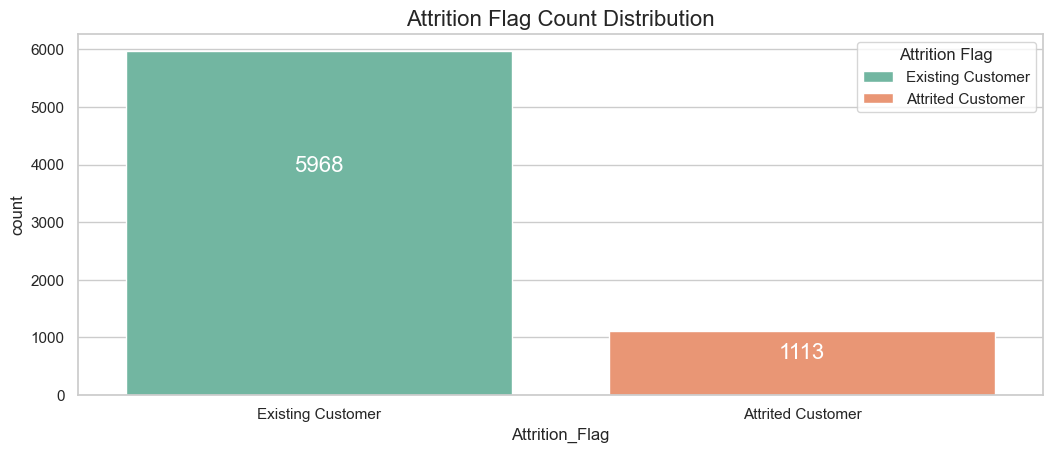

In [37]:
print('Done by Danny')
# visualize the difference in the number of the 'Attrition_Flag' data by calling the countplot on Seaborn
# set a seaborn style
sns.set(style="whitegrid")

# set the figure size
plt.figure(figsize=(12, 6))

# plot with hue and palette details x as attrition flag, hue as attrition flag, 
ax = sns.countplot(x='Attrition_Flag', data=df_Customers, hue='Attrition_Flag', palette='Set2')


# annotate each countplot bar with its value count
for p in ax.patches:
    count = int(p.get_height())
    y_position = p.get_height() * 2 / 3
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., y_position), 
                ha='center', 
                va='center', 
                fontsize=16, 
                color='white', 
                xytext=(0, 0), 
                textcoords='offset points')

plt.title("Attrition Flag Count Distribution", fontsize=16)

plt.legend(title='Attrition Flag', loc='upper right', labels=['Existing Customer', 'Attrited Customer'])

plt.tight_layout(pad=5.0)

plt.show()

### ✅ Conclusion

##### *The countplot shows us visually that the number of attrited customers is approximately 1/6 (16.67%) of the existing customers.*

##### *As noted above, there are 7081 rows of values in each column.  When we divide 1113 (Attrited Customers) by 7081 (total count), we get 15.72%, which is very close to our visual estimation!*   😀

### ❓ Question
##### 1.  What are the demographics of the customers?

In [40]:
print('Done by Danny')
# call the value_counts function on the column Series 'Gender' to find the count of males and female customers
gender_counts = df_Customers['Gender'].value_counts()
print(gender_counts)

## the male and female counts are fairly equal

Done by Danny
Gender
M    3706
F    3375
Name: count, dtype: int64


Done by Danny


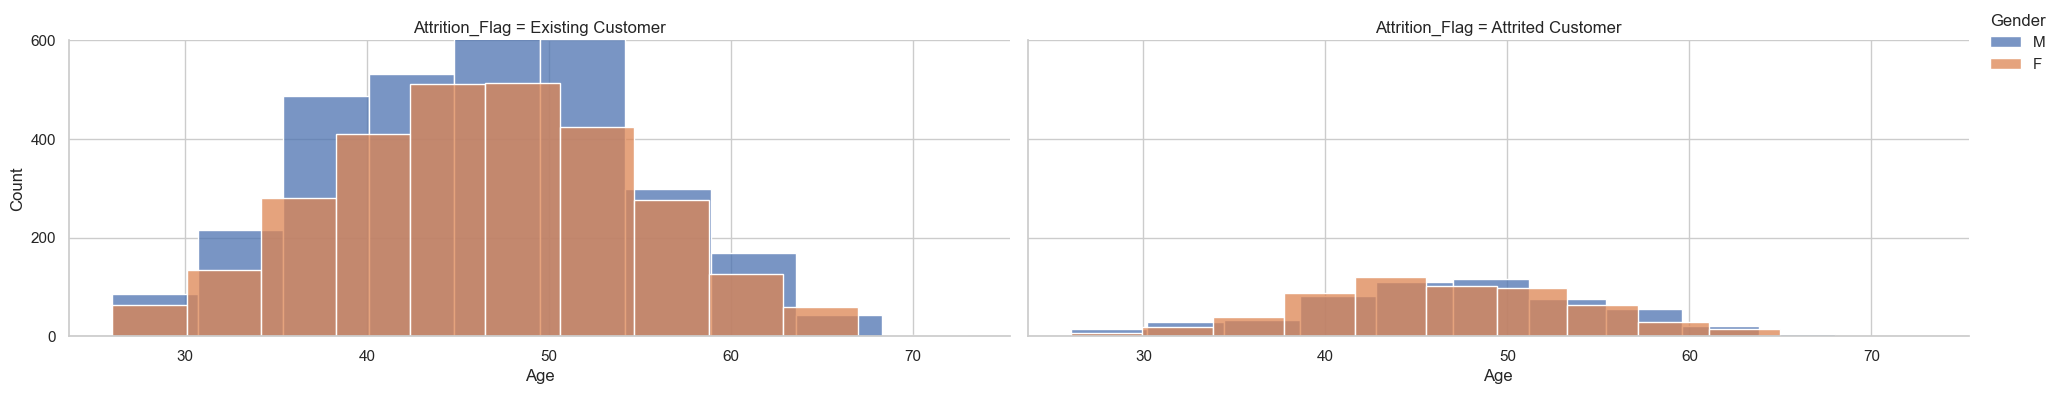

In [41]:
print('Done by Danny')
# set a seaborn style
sns.set(style="whitegrid")

# plot a histogram FacetGrid to show the age of customers separately by gender
#col as attrition flag, hue as gender, hue order 'M','F'
g = sns.FacetGrid(df_Customers, col="Attrition_Flag", hue="Gender", hue_order=["M", "F"], height=4, aspect=2.5)

g.map(sns.histplot, "Age", kde=False, bins=10, multiple="dodge")

g.set(ylim=(0, 600))
plt.yticks(range(0, 601, 200))

g.add_legend(title="Gender", label_order=["M", "F"], loc='upper right')

plt.show()

### ✅ Conclusion

##### *The histogram shows the customers' age and gender graphed separately by two separate plots: Existing Customer and Attrited Customer.*

Done by Danny


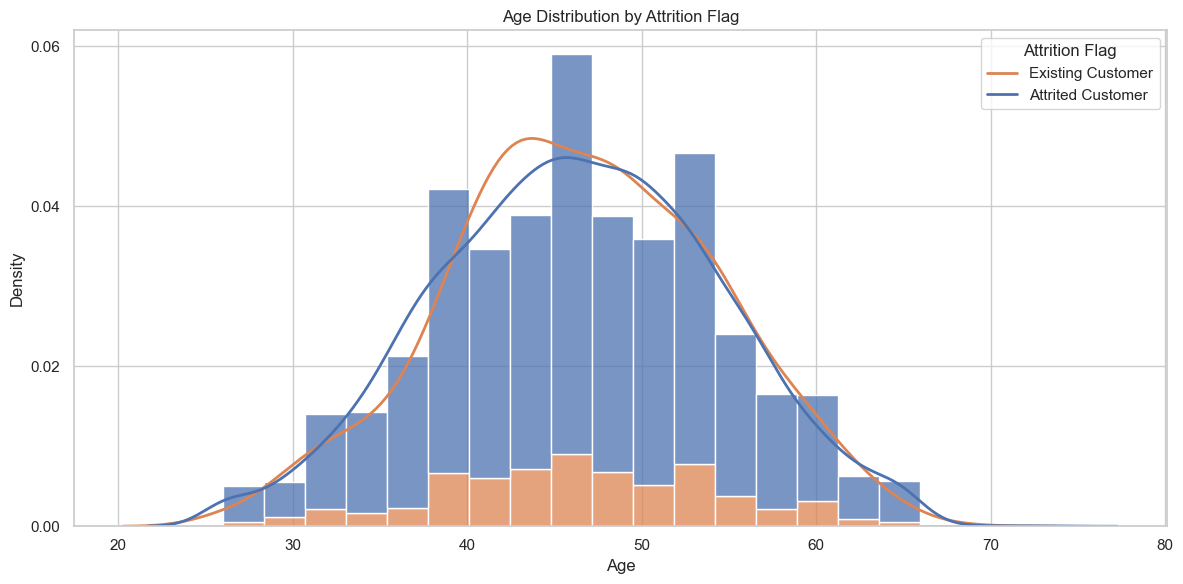

In [43]:
print('Done by Danny')
# set seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# form a facetgrid using  with a 'Atttitionrflag' hue 
sns.histplot(df_Customers, x="Age", hue="Attrition_Flag", stat="density", bins=20, multiple="stack", kde=False)

# map the above form facetgrid with 'Age' attributes 
sns.kdeplot(data=df_Customers, x="Age", hue="Attrition_Flag", common_norm=False, lw=2)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution by Attrition Flag")

plt.yticks([i * 0.02 for i in range(4)])

plt.legend(title="Attrition Flag", loc="upper right", labels=['Existing Customer', 'Attrited Customer'])

plt.tight_layout()
plt.show()

### what are the number on the y-axis?

### ✅ Conclusion

##### *The distribution plot shows that the ages of existing and attrited customers are very similar.  Majority of the customers are between 35 to 55 years old.*

### ❓ Question
##### 2.  Does education level impact the credit line of the customers?

Done by Anthony


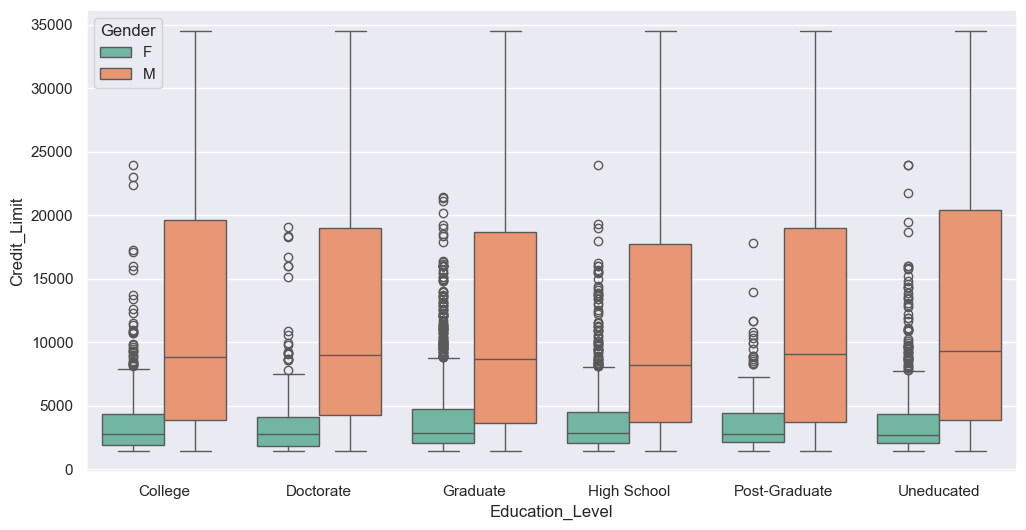

In [46]:
print('Done by Anthony')
# reset default seaborn theme, scaling, and color palette
sns.set()

# set a seaborn style
sns.set(style='whitegrid')

# you set the context to a notebook
sns.set(context='notebook')

# set the figure size
plt.figure(figsize=(12, 6))

# call the boxplot with our DataFrame as data. Give it x-axis, y-axis, and additional arguments, hue and palette
#x education level, y credit limit, hue gender
sns.boxplot(
    data=df_Customers,                
    x='Education_Level',    
    y='Credit_Limit',       
    hue='Gender',           
    palette='Set2'          
)
plt.show()

### ✅ Conclusion

##### *This boxplot shows the shocking disparity of the credit limits assigned to the female and male customers.  Across the board, the female customers were given far less credit limits than male customers, no matter how educated they were.  

##### *Despite the gender differences, the credit limit was very similar with no regard to the education levels of the customers .*

### ❓ Question
##### 3.  How do female and male customers compare in reported income and are customers with higher income given higher credit limits?

Done by Anthony


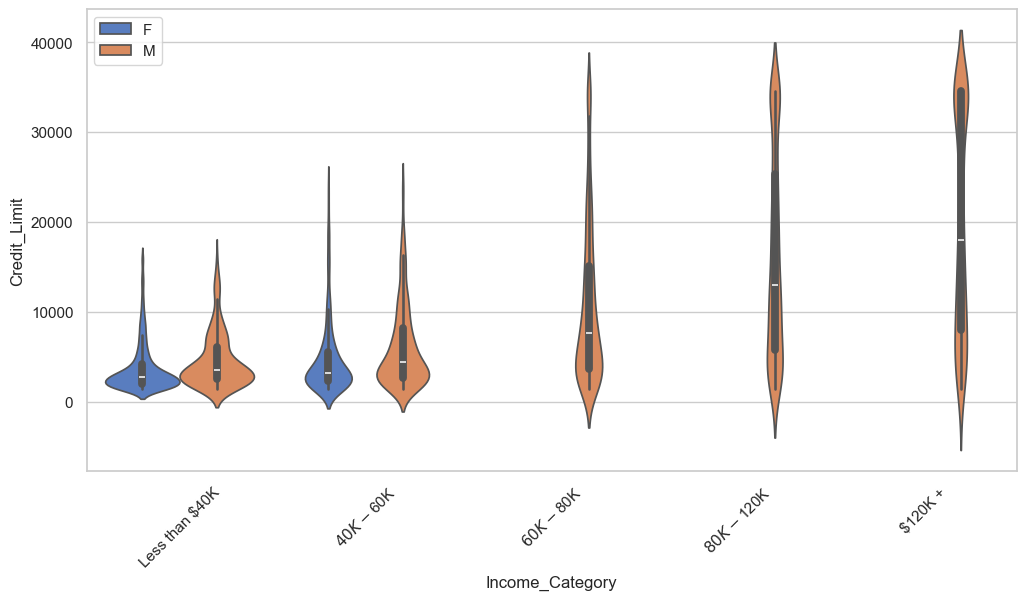

In [49]:
print('Done by Anthony')
# reset default seaborn theme, scaling, and color palette
sns.set()

# set style to plot conditional relationships
sns.set_style("whitegrid")

# set the figure size
plt.figure(figsize=(12, 6))

# call the violinplot with df_Customers as data. Give it x-axis, y-axis, and additional arguments, hue and palette
_=sns.violinplot(
    data=df_Customers,
    x='Income_Category',
    y='Credit_Limit',
    hue='Gender',
    palette='muted',
    order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
)
#x income category, y credit limit, hue gender 

                 # sort the order of the Income_Category categorical string column from dictionary alph-numeric order
                 

# call the set_rotation method to rotate x-axis labels to avoid overlapping labels
for item in _.get_xticklabels():
    item.set_rotation(45)

plt.legend(loc='upper left')
plt.tight_layout
plt.show()

### ✅ Conclusion

##### *As expected the income reported by the male and female customers were consistent to their income. The customers with the higher income were given high credit limits.*  😱

### ❓ Question
##### 4.  Is it possible that the highest credit limits being given to mostly males is due to household income reported for the husband's income in married couples?

Done by Anthony


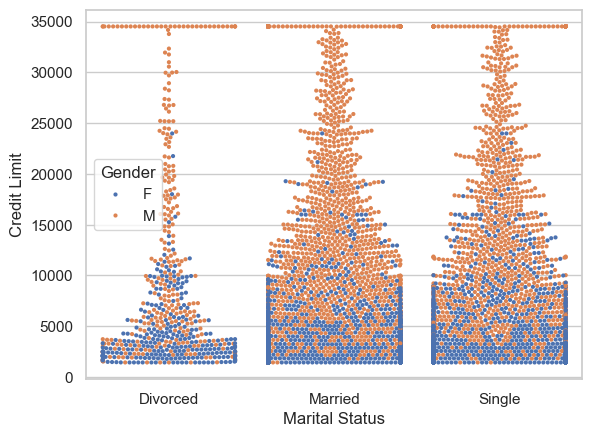

<Figure size 1200x600 with 0 Axes>

In [52]:
print('Done by Anthony')
# call the swarmplot to visualize the credit limits for the different marital status groups distinguished by gender
# set the figure size

sns.swarmplot(data=df_Customers, x='Marital_Status', y='Credit_Limit', hue='Gender', size=3)    
plt.xlabel('Marital Status')  
plt.ylabel('Credit Limit')  
plt.legend(title='Gender')
plt.figure(figsize=(12, 6))
plt.show()  



### ✅ Conclusion

##### *It is sad to say the huge disparity between the income reported by the male and female customers was NOT due to household income reported for the husband's income for married customers. Males were given 2-3 times higher credit limits no matter their marital status!* 😤

## ※  Descriptive Statistics

### ❓ Question
##### 5.  Is it less likely for customers to leave if they have multiple products with one financial institution?

In [56]:
print('Done by Anthony')
# return the unique values in the Education_Level column
df_Customers['Education_Level'].unique()

Done by Anthony


['College', 'Post-Graduate', 'Graduate', 'High School', 'Uneducated', 'Doctorate']
Categories (6, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated']

Done by Anthony


<Figure size 500x500 with 0 Axes>

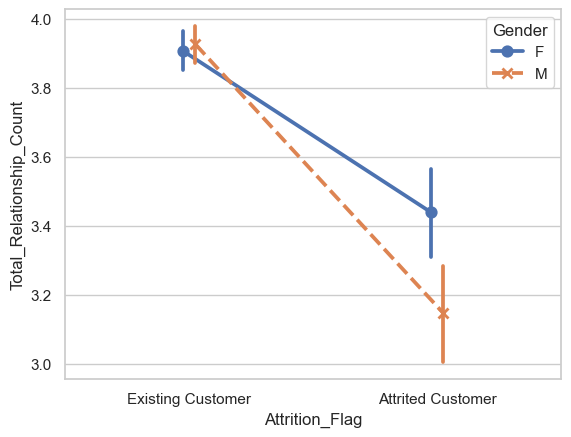

<Figure size 500x500 with 0 Axes>

In [57]:
print('Done by Anthony')
# plot the point plot to show estimate and confidence interval, connecting points from the same hue category
sns.pointplot(
    data=df_Customers,
    x='Attrition_Flag', 
    y='Total_Relationship_Count', 
    hue='Gender', 
    markers=["o", "x"],  
    linestyles=["-", "--"], 
    errorbar='ci', 
    dodge=True
)
plt.figure(figsize=(5, 5))
#x as attrition flag, y as totalrelationship count, 

            # Separate the points for different hue levels along the categorical axis


### ✅ Conclusion

##### *Males with approximately less than 3.3 and females with approximately less than 3.6 multiple products show the greater numbers of customer churning.  It seems more attrited male customers had less multi-products than females, we can also see that more males had slightly higher number of multi-products. 

### ❓ Question
##### 6.  How does customer's balance and usage affect attrition?

In [60]:
print('Done by Anthony')
# create a new DataFrame of just the columns of customer's credit card balance and usage
df_Credit = df_Customers[['Total_Trans_Ct','Total_Trans_Amt','Avg_Trans_Amt','Total_Revolving_Bal']]

#  let's get some statistics in the new DataFrame use describe
df_Credit.describe()

Done by Anthony


,Total_Trans_Ct,Total_Trans_Amt,Avg_Trans_Amt,Total_Revolving_Bal
count,7081.000000,7081.000000,7081.000000,7081.000000
mean,64.503319,4394.299816,62.543610,1167.501624
std,23.809330,3468.461606,26.923696,812.315606
min,10.000000,510.000000,19.137931,0.000000
25%,44.000000,2089.000000,46.807229,463.000000
50%,67.000000,3831.000000,55.530864,1282.000000
75%,80.000000,4740.000000,65.486842,1781.000000
max,134.000000,17995.000000,190.193182,2517.000000


Done by Anthony


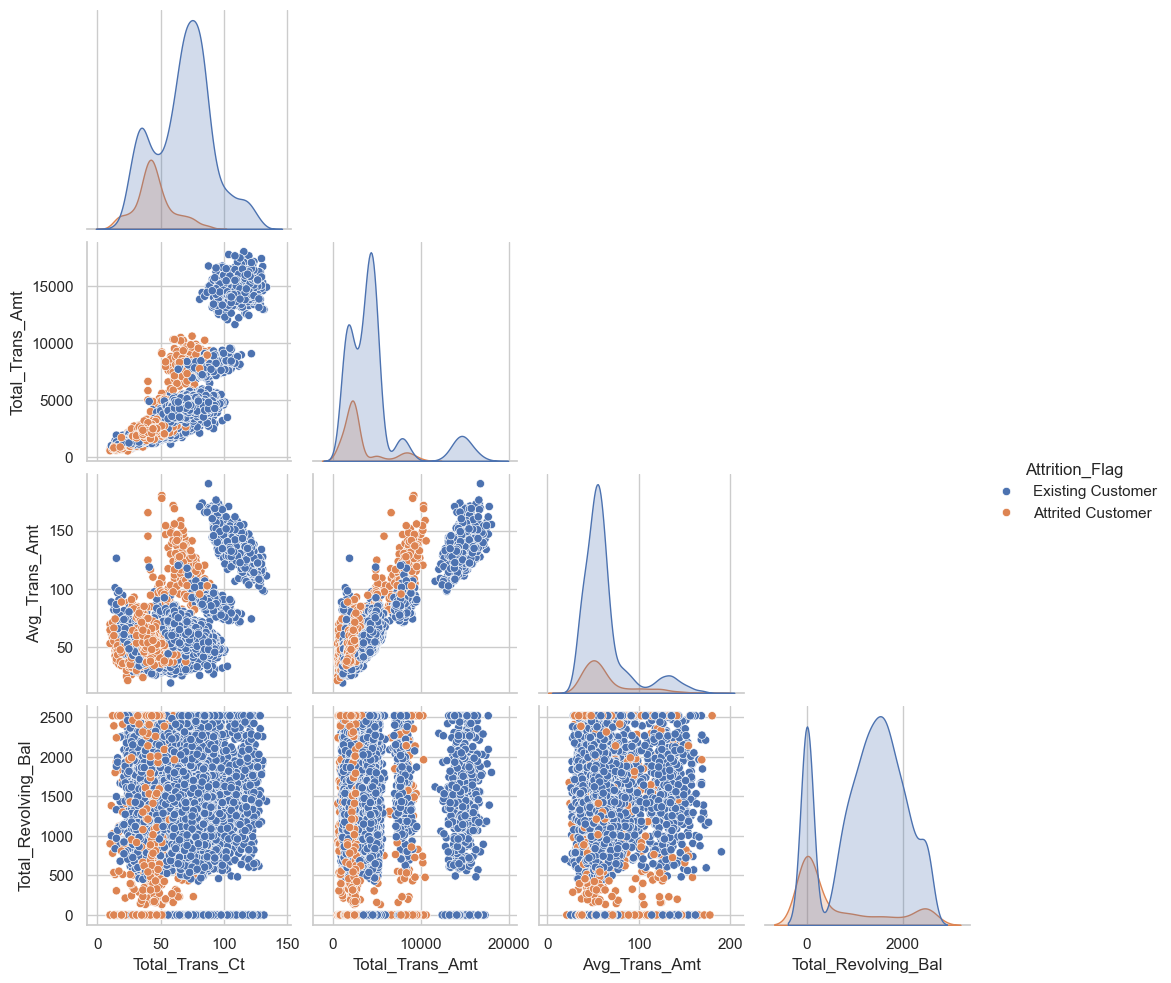

In [61]:
print('Done by Anthony')
# pairplots are used to plot multiple bivariate distributions in a dataset
# showing relationship for combination of variables in a DataFrame as a matrix of plots
# and the diagonal plots are the univariate plots.

# create a pairplot of the customer's credit card balance and usage

               # as the upper triangle plots mirror the lower triangle ones, only the lower triangle are plotted
sns.pairplot(
    data=df_Customers,
    vars=['Total_Trans_Ct', 'Total_Trans_Amt', 'Avg_Trans_Amt','Total_Revolving_Bal'], 
    hue='Attrition_Flag',
    corner=True,
    diag_kind='kde'
    )

### ✅ Conclusion

##### *By visualizing multiple plots, we can make multiple conclusions with one plot:
- Attrited customers had lower total transaction count, average transaction, total transaction amount, and total balance compared to the existing customers


##### *In comparing credit card customer's actitivites and balance, we can easily compare the customer credit card balance and usage in customer attrition.  I can conclude that attrited customers overall used their credit card less, spent less money per transaction and total transaction, and carried a lower balance. 

In [63]:
print('Done by Anthony')
# generate a new DataFrame for Attrited Customer
df_Attrited_Customers = df_Customers[df_Customers['Attrition_Flag'] == 'Attrited Customer']

# use only the Credit_Limit column 
df_Credit_Limit = df_Attrited_Customers[['Credit_Limit']]

# pass it to another data frame
df_Credit_Limit.head()

Done by Anthony


,Credit_Limit
Income_Sorted,
4,4935.0
4,16828.0
4,13662.0
4,34516.0
4,34516.0


Done by Anthony


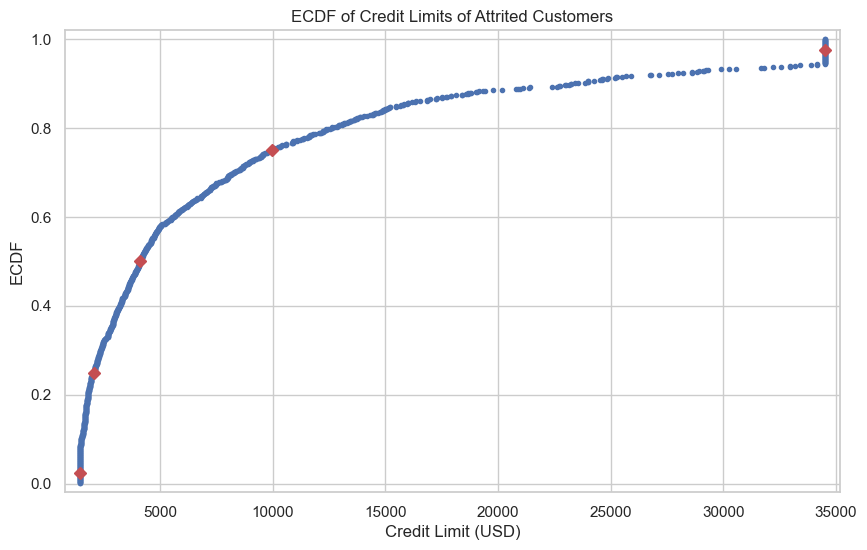

In [64]:
print('Done by Anthony')
# ECDF (Emperical Cumulative Distribution Function) is a step function used to show the distribution of data. 
# The advantage of using an ECDF plot over histograms is that ECDF are immune to binning bias.
# ECDF can also answer what percentage of the data is under the specific value.

# create our ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # sort data from the lowest value to the highest value
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # the y-axis is set to evenly spaced data points generated by using the np.arange function
    # with a maximum of one (which is 100%) and then divding by the total number of data points
    y = np.arange(1, n+1) / n
    return x, y


# create the x and y axis for the column 'Credit_Limit'
x, y = ecdf(df_Credit_Limit['Credit_Limit'])

# set seaborn style
sns.set(style='whitegrid')

# set the figure size
plt.figure(figsize=(10, 6))

# set the ecdf
plt.plot(x, y, marker=".", linestyle="none")

# use the percentile method to get the array of 2.5, 25, 50, 75, 97.5 percentiles
percentiles = [2.5, 25, 50, 75, 97.5]
perc_values = np.percentile(df_Credit_Limit, percentiles)

# overlay percentiles as red diamonds
plt.plot(perc_values, [0.025, 0.25, 0.5, 0.75, 0.975], 'rD', label='Percentiles')

# give it a title and add the labels to x and y axes
plt.title('ECDF of Credit Limits of Attrited Customers')
plt.xlabel('Credit Limit (USD)')
plt.ylabel('ECDF')

# use the plt.margins function to make sure none of the data points run over the side of the plot area
# choosing a value of point .02 gives a 2% buffer all around the plot
plt.margins(0.02)
            
# show the plot            
plt.show()

### ✅ Conclusion

##### *Some information we can get from the ECDF are:*

- Approximately 75% of the attrited customers have a credit limit less than 10,000 USD.

- Top 25% percent have the greatest spread of credit limits, between 10,000 USD to 35,000 USD.

- Majority of the attrited customer has a credit limit of less than 5000 USD.

In [66]:
print('Done by Anthony')
# compute the mean with np.mean method and pass in the array element Attrited_Credit_Limit
np.mean(df_Credit_Limit)

Done by Anthony


8158.579964061096

In [67]:
print('Done by Anthony')
# compute the median with np.median method and pass in the array element Attrited_Credit_Limit
np.median(df_Credit_Limit)

Done by Anthony


4116.0

In [68]:
print('Done by Anthony')
# compute the variance with np.var method and pass in the array element Attrited_Credit_Limit
np.var(df_Credit_Limit)

Done by Anthony


Credit_Limit    8.408809e+07
dtype: float64

In [69]:
print('Done by Anthony')
# compute the standard deviation with np.std method and pass in the array element Attrited_Credit_Limit
np.std(df_Credit_Limit)

Done by Anthony


Credit_Limit    9169.95575
dtype: float64

## ※  Quantitative Data Exploratory Descriptive

Done by Danny


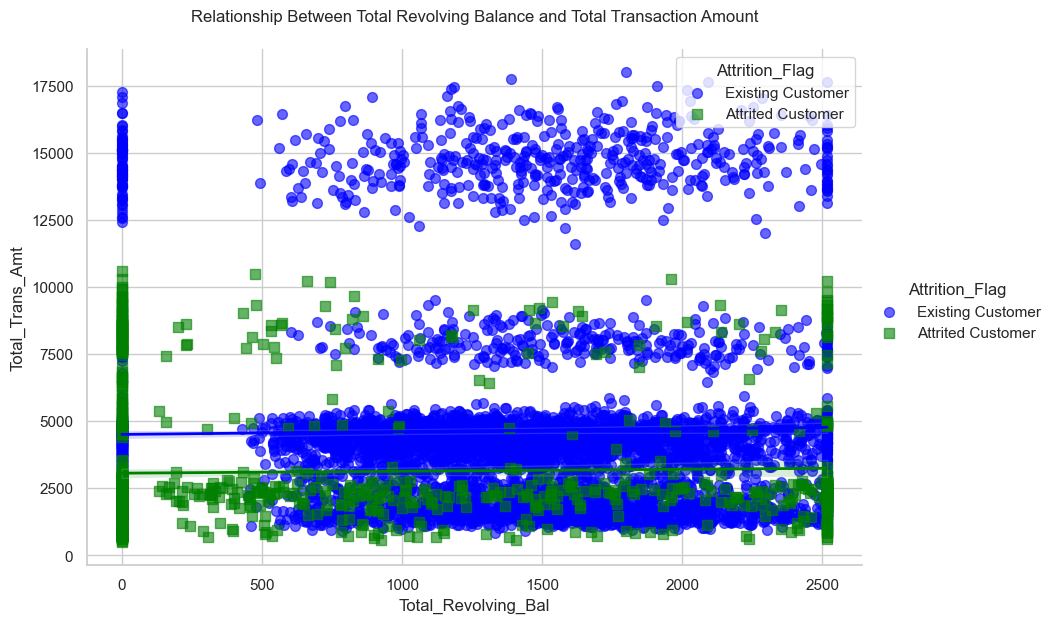

In [71]:
print('Done by Danny')
# Correlation is the concept of linear relationship between two variables.
sns.set(style="whitegrid")
# use the lmplot to plot data and linear regression between two variables
lmplot = sns.lmplot(
    data=df_Customers,
    x="Total_Revolving_Bal",
    y="Total_Trans_Amt",
    hue="Attrition_Flag",
    palette={"Existing Customer": "blue", "Attrited Customer": "green"},
    markers=["o", "s"],
    height=6,
    aspect=1.5,
    scatter_kws={"s": 50, "alpha": 0.6}, 
    line_kws={"linewidth": 2},
)

lmplot.set_axis_labels("Total_Revolving_Bal", "Total_Trans_Amt")
plt.title("Relationship Between Total Revolving Balance and Total Transaction Amount", pad=20)
plt.legend(title="Attrition_Flag", loc="upper right")

In [72]:
print('Done by Danny')
# use the correlation method to calculate the correlation between 'Total_Revolving_Bal' and 'Total_Trans_Amt'
columns_of_interest = ['Total_Revolving_Bal', 'Total_Trans_Amt']

correlation_matrix = df_Customers[columns_of_interest].corr()

print(correlation_matrix)

Done by Danny
                     Total_Revolving_Bal  Total_Trans_Amt
Total_Revolving_Bal             1.000000         0.063782
Total_Trans_Amt                 0.063782         1.000000


### ✅ Conclusion

##### *The horizontal regression line for both existing and attrited customers indicates Total_Revolving_Bal does not seem to be a good predictor of the Total_Trans_Amt. Furthermore, the data points are grouped into 3 sections but very scatteredaway from the fitted line.  This shows lots of variability and refutes the reliability of the variable.

##### *The correlation between 'Total_Trans_Amt' and 'Total_Revolving_Bal'  is approximately 0.063782.  After reviewing the lmplot and the correlation method, we can say that they have a weak or no linear relationship.

Done by Danny


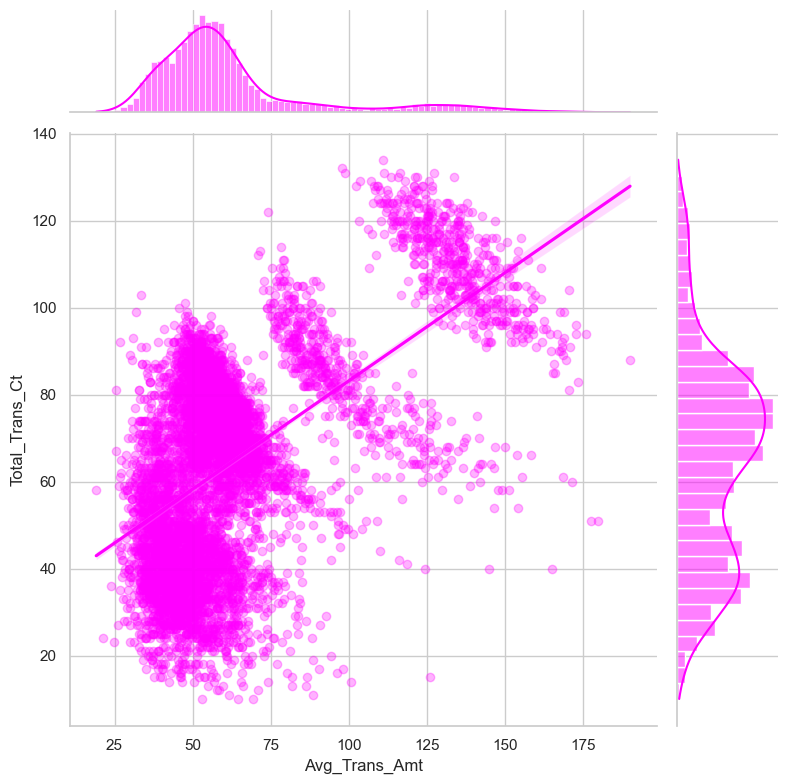

In [74]:
print('Done by Danny')
# regplot performs a simple linear regression model fit and plots the data
# jointplot can use regplot to show linear regression fit on the joint axes by passing kind='reg'
# use the correlation method to calculate the correlation between 'Total_Revolving_Bal' and 'Total_Trans_Amt'
sns.set(style="whitegrid")

plot = sns.jointplot(
    df_Customers,
    x="Avg_Trans_Amt",
    y="Total_Trans_Ct",
    kind="reg",
    height=8,
    color="magenta",
    scatter_kws={'alpha': 0.3},
)

plt.show()

In [75]:
print('Done by Danny')
# use the correlation method to calculate the correlation between 'Avg_Trans_Amt' and 'Total_Trans_Ct'
columns_of_interest = ['Avg_Trans_Amt', 'Total_Trans_Ct']

correlation_matrix = df_Customers[columns_of_interest].corr()

print(correlation_matrix)


Done by Danny
                Avg_Trans_Amt  Total_Trans_Ct
Avg_Trans_Amt        1.000000        0.561717
Total_Trans_Ct       0.561717        1.000000


### ✅ Conclusion

##### The rising regression line for the credit card customers indicates Avg_Trans_Amt is positively correlated to the Total_Trans_Ct. The Avg_Trans_Amt may be a pretty good predictor of Total_Trans_Ct since the regression line is almost diagonal. Furthermore, the correlation between them is approximately 0.812263.  

##### After reviewing the regplot and the correlation method, we can say that 'Avg_Trans_Amt'  and 'Total_Trans_Ct' have a strong positive correlation. 

Done by Danny


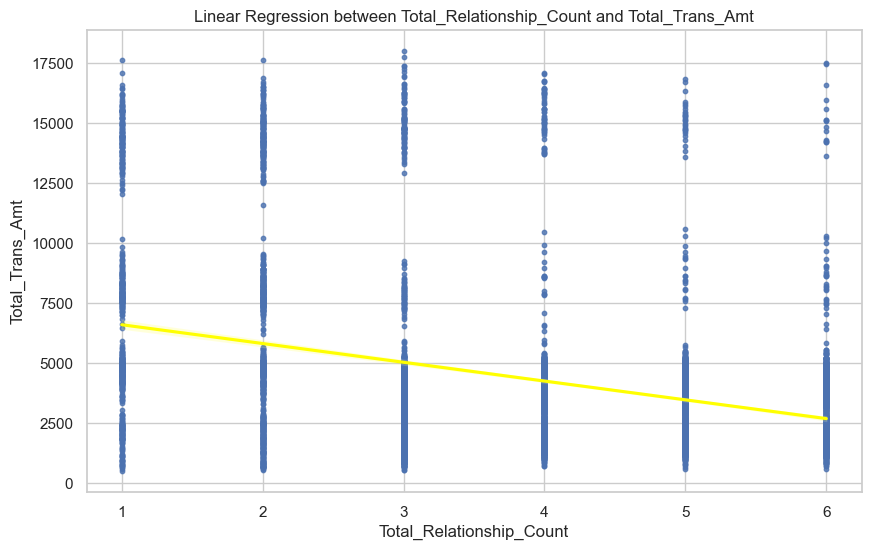

In [77]:
print('Done by Danny')
# use the regplot to plot data and linear regression between two variables x total relationship count, y total trans amt
plt.figure(figsize=(10, 6))

sns.regplot(
    x='Total_Relationship_Count', 
    y='Total_Trans_Amt', 
    data=df_Customers, 
    scatter_kws={'s':10}, 
    line_kws={'color':'yellow'}
)

plt.title('Linear Regression between Total_Relationship_Count and Total_Trans_Amt')

plt.show() 


In [78]:
print('Done by Danny')
# use the correlation method to calculate the correlation between 'Total_Relationship_Count' and 'Total_Trans_Amt'
columns_of_interest = ['Total_Relationship_Count', 'Total_Trans_Amt']

correlation_matrix = df_Customers[columns_of_interest].corr()

print(correlation_matrix)


Done by Danny
                          Total_Relationship_Count  Total_Trans_Amt
Total_Relationship_Count                  1.000000        -0.348024
Total_Trans_Amt                          -0.348024         1.000000


### ✅ Conclusion

##### The declining regression line for the credit card customers indicates Total_Relationship_Count is negatively correlated to the Total_Trans_Amt. The Total_Relationship_Count is likely not a good predictor of Total_Trans_Amt.  Furthermore, the correlation between them is approximately 0.0.348024.  

##### After reviewing the regplot and the correlation method, we can say that 'Total_Relationship_Count'  and 'Total_Trans_Amt' have a slightly negative correlation. 

## ※  Testing Hypothesis

In [81]:
print('Done by Danny')
# Covariance is a measure of how two variables are related to each other; how two variables vary with each other.
#do this for avg trans amt and total trans amt 
cov_matrix = df_Customers[['Avg_Trans_Amt', 'Total_Trans_Amt']].cov()

print(cov_matrix)

Done by Danny
                 Avg_Trans_Amt  Total_Trans_Amt
Avg_Trans_Amt       724.885407     8.534319e+04
Total_Trans_Amt   85343.192820     1.203023e+07


### ✅ Conclusion

##### The covariance of Avg_Trans_Amt and Total_Trans_Amt are positively correlated because 8.53431928e+04 is greater than 0.

##### 💠  Normal Test 1

- **H<sub>0</sub>** : Distribution is Normal
- **H<sub>1</sub>** : Distribution is not Normal

In [84]:
print('Done by Danny')
# call the normaltest in the statistics package to test if the Avg_Trans_Amt is normally distributed
stat, p_value = normaltest(df_Customers['Avg_Trans_Amt'])

# indicate the significance level (denoted as α or alpha) 
alpha = 0.05

# print results
print("Normal Test Results:")
print(f"    statistics = {stat}")
print(f"    p_value = {p_value}")

# null hypothesis: x comes from a normal distribution
if p_value < alpha:
    print("The null hypothesis can be rejected: The distribution is not normal.")
else:
    print("The null hypothesis cannot be rejected: The distribution is normal.")

Done by Danny
Normal Test Results:
    statistics = 2443.2868000205535
    p_value = 0.0
The null hypothesis can be rejected: The distribution is not normal.


Done by Danny


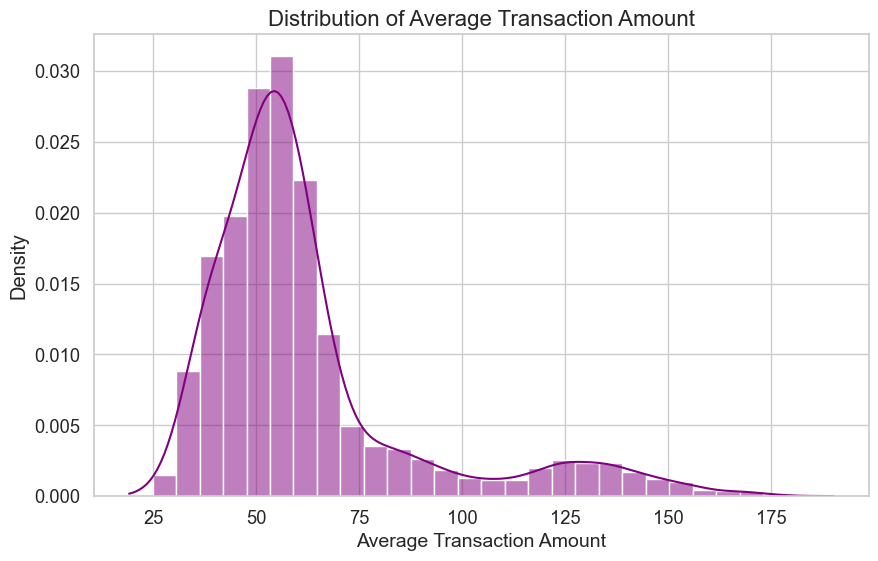

In [85]:
print('Done by Danny')
# utilize plt.rcParams to help me to set the figure width width of 10 and height of 6
plt.rcParams['figure.figsize'] = (10, 6)

# set style
sns.set(style="whitegrid")

# set context, font scale and font size to enhance plot
sns.set_context("notebook", font_scale=1.2)

# plot distplot to show the distribution
# fit will plot a normal curve to the distribution histogram
# set kde to false because kde is set by default
sns.histplot(df_Customers['Avg_Trans_Amt'], kde=True, stat="density", bins=30, color="purple", line_kws={'color': 'black'})

# add title and xlabel to the plot
plt.title("Distribution of Average Transaction Amount", fontsize=16)
plt.xlabel("Average Transaction Amount", fontsize=14)

plt.show()

### ✅ Conclusion

##### A small p-value (typically ≤ 0.05) indicatges strong evidence against the H<sub>0</sub> , so you reject the null hypothesis.

##### Therefore, the histogram clearly shows the Avg_Trans_Amt is right-skewed.  As the p-value (0) is less than 0.05 (the significance level), the null hypothesis is false and can be rejected. 

##### 💠  Normal Test 2

In [88]:
print('Done by Danny')
# call the normaltest in the statistics package to test if the Customer_Contacts is normally distributed
stat, p_value = stats.normaltest(df_Customers['Customer_Contacts'])

# indicate the significance level (denoted as α or alpha) 
alpha = 0.05

# print results
print(f"Normal Test Results:\n    Statistics = {stat}\n    p-value = {p_value}")

 # null hypothesis: x comes from a normal distribution
if p_value < alpha:
    print("The null hypothesis can be rejected: The data does not come from a normal distribution.")
else:
    print("The null hypothesis cannot be rejected: The data may come from a normal distribution.")

Done by Danny
Normal Test Results:
    Statistics = 0.8244399921449422
    p-value = 0.6621785833391884
The null hypothesis cannot be rejected: The data may come from a normal distribution.


Done by Anthony


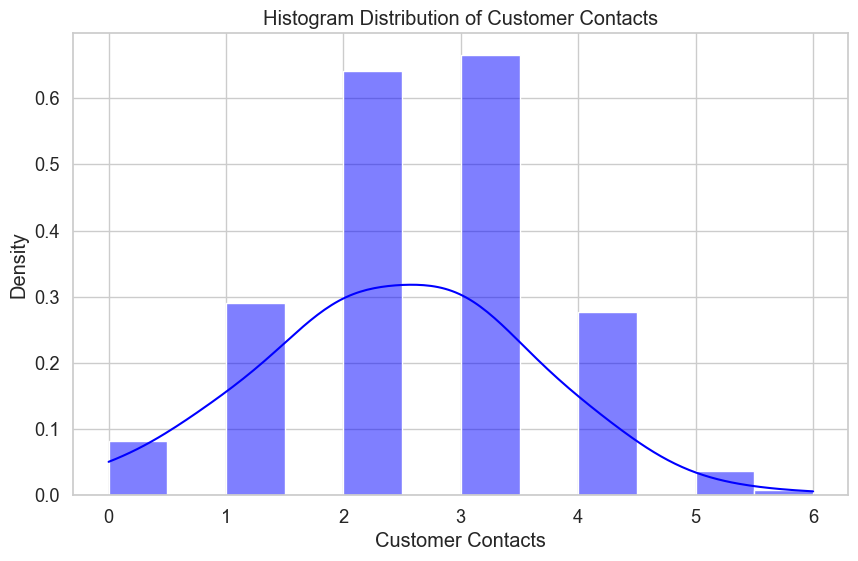

In [89]:
print('Done by Anthony')
# utilize plt.rcParams to help me to set the figure width width of 10 and height of 6
plt.rcParams['figure.figsize'] = [10, 6]

# set style
sns.set_style("whitegrid")

# set context, font scale and font size to enhance plot
sns.set_context("notebook", font_scale=1.2)

# plot distplot to show the distribution
# fit will plot a normal curve to the distribution histogram
# set kde to false because kde is set by default
sns.histplot(df_Customers['Customer_Contacts'], kde=True, stat="density",bins=12, color="blue",kde_kws={"bw_adjust": 3})

# add title and xlabel to the plot
plt.title("Histogram Distribution of Customer Contacts")
plt.xlabel("Customer Contacts")

plt.show()


### ✅ Conclusion

##### A large p-value (> 0.05) indicates weak evidence against the H<sub>0</sub> , so you fail to reject the null hypothesis.

##### Therefore, the histogram shows a fairly normal distribution of  Customer_Contacts.  As the p-value (0.6621785833391884) is greater than 0.05 (the significance level), the null hypothesis is true. 

##### 💠  Chi-Squared Test

In [92]:
print('Done by Anthony')
# test whether two categorical variables are related or independent.
from scipy.stats import chi2_contingency
# Example of the Chi-Squared Test
stat, p, dof, expected = chi2_contingency(df_Customers['Avg_Trans_Amt'], df_Customers['Total_Trans_Amt'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
   print('Probably independent')
else:
  print('Probably dependent')
# print


Done by Anthony
stat=0.000, p=1.000
Probably independent


##### 💠  Pearson's Correlation Test

In [94]:
print('Done by Anthony')
from scipy.stats import pearsonr
# test whether two samples have a linear relationship.
stat, p = pearsonr(df_Customers['Avg_Trans_Amt'], df_Customers['Total_Trans_Amt'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably independent')
else:
 print('Probably dependent')

Done by Anthony
stat=0.914, p=0.000
Probably dependent


##### 💠  ANOVA

In [96]:
print('Done by Danny')
#extract the Length_Of_Relationship and Avg_Trans_Amt data
data = df_Customers[['Length_Of_Relationship', 'Avg_Trans_Amt', 'Income_Category']]

#group the data by Income_Category
grouped_data = [group['Avg_Trans_Amt'].values for name, group in data.groupby('Income_Category')]

#use the f_oneway method, built-in function of the scipy package, to perform the ANOVA test
#pass in the price data of the two car make groups that we want to #compare, and it calculates the ANOVA results.
anova_result = stats.f_oneway(*grouped_data)

print(f"ANOVA results: F={anova_result}")
if p < 0.05:
    print("Reject null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject null hypothesis: No significant difference between groups.")

Done by Danny
ANOVA results: F=F_onewayResult(statistic=2.3881733787340473, pvalue=0.0487783080230463)
Reject null hypothesis: There is a significant difference between groups.


### ✅ Conclusion

##### The average transaction amount between the highest (120K USD+) and the lowest (Less than 40K USD) income categories were not significantly different, as the F-test score is very low and p-value is larger than 0.05.

##### 💠  Z Test

Since my dataset is larger than 30, z-test will be used over the t-test, to test a hypothesis about the population mean. By the virtue of limit central theorem, one sample z-test to do the test.

#### Testing the hypothesis that the mean is 88 against the alternative that it is not

$\begin{align}
  & {{H}_{0}}:\,\mu =\,{{\mu }_{0}} \\ 
 & {{H}_{1}}:\,\mu \ne {{\mu }_{0}} \\ 
\end{align}$

In [100]:
print('Done by Danny')
data = df_Customers['Avg_Trans_Amt']

mu = 88

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
sample_size = len(data)

t_statistic, p_value = stats.ttest_1samp(data, mu)

print(f"The test statistic is: {t_statistic:.5f}")
print(f"The p-value is: {p_value:.5f}")

if p_value < 0.05:
    print("The null hypothesis is rejected, meaning the mean is significantly different from 88.")
else:
    print("The null hypothesis cannot be rejected, meaning the mean is not significantly different from 88.") 


Done by Danny
The test statistic is: -79.56269
The p-value is: 0.00000
The null hypothesis is rejected, meaning the mean is significantly different from 88.


### ✅ Conclusion

##### The p-value is 0. At alpha = 0.05 level of significance, we can reject the null hypothesis and conclude that the mean Avg_Trans_Amt is not 88.

#### Testing the hypothesis that the mean is 88 against the alternative that it is GREATER

$\begin{align}
  & {{H}_{0}}:\mu <={{\mu }_{0}} \\ 
 & {{H}_{1}}:\mu >{{\mu }_{0}} \\ 
\end{align}$   

In [103]:
print('Done by Danny')
data = df_Customers['Avg_Trans_Amt']

mu = 88

t_statistic, p_value = stats.ttest_1samp(data, mu)

if t_statistic > 0:
    p_value = p_value / 2

print(f"The test statistic is: {t_statistic:.5f}")
print(f"The p-value is: {p_value:.5f}")

if p_value < 0.05:
    print("The null hypothesis is rejected, meaning the mean is significantly greater than 88.")
else:
    print("The null hypothesis cannot be rejected, meaning the mean is not significantly greater than 88.") 


Done by Danny
The test statistic is: -79.56269
The p-value is: 0.00000
The null hypothesis is rejected, meaning the mean is significantly greater than 88.


#### Testing the hypothesis that the mean is 88 against the alternative that it is SMALLER

$\begin{align}
  & {{H}_{0}}:\mu >={{\mu }_{0}} \\ 
 & {{H}_{1}}:\mu < {{\mu }_{0}} \\ 
\end{align}$   

In [105]:
print('Done by Danny')
data = df_Customers['Avg_Trans_Amt']

mu = 88

t_statistic, p_value = stats.ttest_1samp(data, mu)

if t_statistic > 0:
    p_value = p_value / 2

print(f"The test statistic is: {t_statistic:.5f}")
print(f"The p-value is: {p_value:.5f}")

if p_value < 0.05:
    print("The null hypothesis is rejected, meaning the mean is significantly smaller than 88.")
else:
    print("The null hypothesis cannot be rejected, meaning the mean is not significantly smaller than 88.") 


Done by Danny
The test statistic is: -79.56269
The p-value is: 0.00000
The null hypothesis is rejected, meaning the mean is significantly smaller than 88.


## ※  Summary and Conclusion

**This dataset of credit card customers was really insightful. There were so many demographic and customer activity information. It was interesting how some information I thought would be a good correlation had no effect on each other. For example, I thought the total transaction count and total revolving balance would be related, but surprised to find they were independent of each other.  

**It would be very difficult to predict churning customers without doing more research and finding out what else the customers want or need. The bank may run some promotion to retain their customers. It would be great to set-up some promotion and see if that helps to increase more cross-selling opportunities, as it seems customers that have more products tend to continue their relationship with the bank.  

**Finally, the most surprising aspect of this analysis is how low the income has been reported for females and how few females have accounts at this bank. I think they really should focus on taking advantage of tapping into this market.
